In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium
plt.style.use('fivethirtyeight')

In [2]:
df_virus=pd.read_csv('200807COVID19MEXICO.csv', encoding = "ISO-8859-1")
#df_entidades=pd.read_csv('ENTIDADES.csv', encoding = "ISO-8859-1")

In [3]:
df_virus.head()

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
0,07/08/2020,0f9404,2,3,25,1,11,25,6,2,...,2,2,2,2,99,1,99,MÃ©xico,99,2
1,07/08/2020,07b035,2,4,1,1,1,1,1,1,...,2,2,2,2,99,1,99,MÃ©xico,99,97
2,07/08/2020,08c8fb,2,4,9,2,9,9,2,2,...,2,2,2,2,99,1,99,MÃ©xico,99,2
3,07/08/2020,1a59f9,2,3,27,1,27,27,4,1,...,2,2,2,2,1,1,99,MÃ©xico,99,97
4,07/08/2020,023a88,2,4,26,1,25,26,55,2,...,2,2,2,2,99,1,99,MÃ©xico,99,2


In [4]:
df_virus.drop(['HABLA_LENGUA_INDIG','ENTIDAD_UM','FECHA_ACTUALIZACION','ID_REGISTRO','ENTIDAD_NAC','MIGRANTE','PAIS_NACIONALIDAD','PAIS_ORIGEN','INTUBADO','UCI','OTRO_CASO'],axis=1,inplace=True)

In [5]:
df_virus.head()

,ORIGEN,SECTOR,SEXO,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,NEUMONIA,...,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,RESULTADO
0,2,3,1,25,6,2,09/06/2020,06/06/2020,16/06/2020,1,...,2,2,2,2,2,2,2,2,2,1
1,2,4,1,1,1,1,23/04/2020,13/04/2020,9999-99-99,2,...,2,2,2,2,2,2,2,2,2,1
2,2,4,2,9,2,2,29/04/2020,22/04/2020,03/05/2020,1,...,2,2,2,1,2,2,2,2,2,1
3,2,3,1,27,4,1,25/06/2020,20/06/2020,9999-99-99,1,...,2,2,2,1,2,2,2,2,2,1
4,2,4,1,26,55,2,30/03/2020,27/03/2020,9999-99-99,1,...,2,2,2,1,2,2,2,2,2,1


In [ ]:
#df_virus["Defuncion"] = df_virus.apply(lambda x: "0" if (x["FECHA_DEF"]) == '9999-99-99' else "1", axis=1)
#df_virus.head()

In [6]:
entidades={
1:'Aguascalientes',
2:'Baja California',
3:'Baja California Sur',
4:'Campeche',
5:'Coahuila',
6:'Colima',
7:'Chiapas',
8:'Chihuahua',
9:'Ciudad De Mexico',
10:'Durango',
11:'Guanajuato',
12:'Guerrero',
13:'Hidalgo',
14:'Jalisco',
15:'Mexico',
16:'Michoacan',
17:'Morelos',
18:'Nayarit',
19:'Nuevoleon',
20:'Oaxaca',
21:'Puebla',
22:'Queretaro',
23:'Quintana Roo',
24:'Sanluispotosi',
25:'Sinaloa',
26:'Sonora',
27:'Tabasco',
28:'Tamaulipas',
29:'Tlaxcala',
30:'Veracruz',
31:'Yucatan',
32:'Zacatecas',
36:'Estados Unidos Mexicanos',
97:'No Aplica',
98:'Se Ignora',
99:'No Especificado'}

df_virus.head()

,ORIGEN,SECTOR,SEXO,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,NEUMONIA,...,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,RESULTADO
0,2,3,1,25,6,2,09/06/2020,06/06/2020,16/06/2020,1,...,2,2,2,2,2,2,2,2,2,1
1,2,4,1,1,1,1,23/04/2020,13/04/2020,9999-99-99,2,...,2,2,2,2,2,2,2,2,2,1
2,2,4,2,9,2,2,29/04/2020,22/04/2020,03/05/2020,1,...,2,2,2,1,2,2,2,2,2,1
3,2,3,1,27,4,1,25/06/2020,20/06/2020,9999-99-99,1,...,2,2,2,1,2,2,2,2,2,1
4,2,4,1,26,55,2,30/03/2020,27/03/2020,9999-99-99,1,...,2,2,2,1,2,2,2,2,2,1


In [7]:
entidades

{1: 'Aguascalientes',
 2: 'Baja California',
 3: 'Baja California Sur',
 4: 'Campeche',
 5: 'Coahuila',
 6: 'Colima',
 7: 'Chiapas',
 8: 'Chihuahua',
 9: 'Ciudad De Mexico',
 10: 'Durango',
 11: 'Guanajuato',
 12: 'Guerrero',
 13: 'Hidalgo',
 14: 'Jalisco',
 15: 'Mexico',
 16: 'Michoacan',
 17: 'Morelos',
 18: 'Nayarit',
 19: 'Nuevoleon',
 20: 'Oaxaca',
 21: 'Puebla',
 22: 'Queretaro',
 23: 'Quintana Roo',
 24: 'Sanluispotosi',
 25: 'Sinaloa',
 26: 'Sonora',
 27: 'Tabasco',
 28: 'Tamaulipas',
 29: 'Tlaxcala',
 30: 'Veracruz',
 31: 'Yucatan',
 32: 'Zacatecas',
 36: 'Estados Unidos Mexicanos',
 97: 'No Aplica',
 98: 'Se Ignora',
 99: 'No Especificado'}

In [8]:
df_virus['ENTIDAD_RES'] =df_virus['ENTIDAD_RES'].map(entidades)

In [9]:
df_virus.head()

,ORIGEN,SECTOR,SEXO,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,NEUMONIA,...,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,RESULTADO
0,2,3,1,Sinaloa,6,2,09/06/2020,06/06/2020,16/06/2020,1,...,2,2,2,2,2,2,2,2,2,1
1,2,4,1,Aguascalientes,1,1,23/04/2020,13/04/2020,9999-99-99,2,...,2,2,2,2,2,2,2,2,2,1
2,2,4,2,Ciudad De Mexico,2,2,29/04/2020,22/04/2020,03/05/2020,1,...,2,2,2,1,2,2,2,2,2,1
3,2,3,1,Tabasco,4,1,25/06/2020,20/06/2020,9999-99-99,1,...,2,2,2,1,2,2,2,2,2,1
4,2,4,1,Sonora,55,2,30/03/2020,27/03/2020,9999-99-99,1,...,2,2,2,1,2,2,2,2,2,1


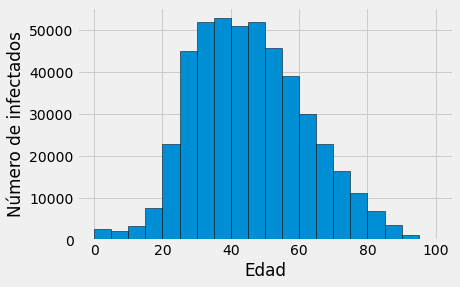

In [10]:
df_edad=df_virus.loc[df_virus['RESULTADO'] == 1]
plt.hist(df_edad['EDAD'], bins=20, range=(0,100), histtype='bar', ec='black')
plt.xlabel('Edad')
plt.ylabel('Número de infectados')
plt.show()

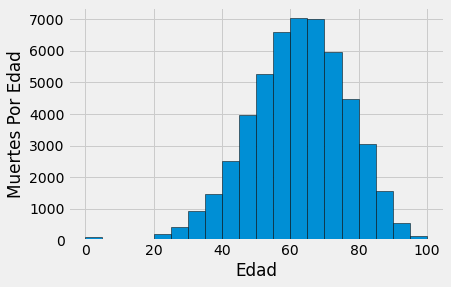

In [11]:
df_edad= df_virus.loc[(df_virus['RESULTADO'] == 1) & (df_virus['FECHA_DEF'] != '9999-99-99') & (df_virus.FECHA_DEF.notnull())]
plt.hist(df_edad['EDAD'], bins=20, range=(0,100), histtype='bar', ec='black')
plt.xlabel('Edad')
plt.ylabel('Muertes Por Edad')
plt.show()

In [12]:
ENTIDAD_INFECTADOS=df_virus.loc[(df_virus['RESULTADO'] == 1)]
ENTIDAD_INFECTADOS=ENTIDAD_INFECTADOS['ENTIDAD_RES'].value_counts()

(-1.1011477051629806,
 1.1000546527604176,
 -1.1007304162969407,
 1.108336486536686)

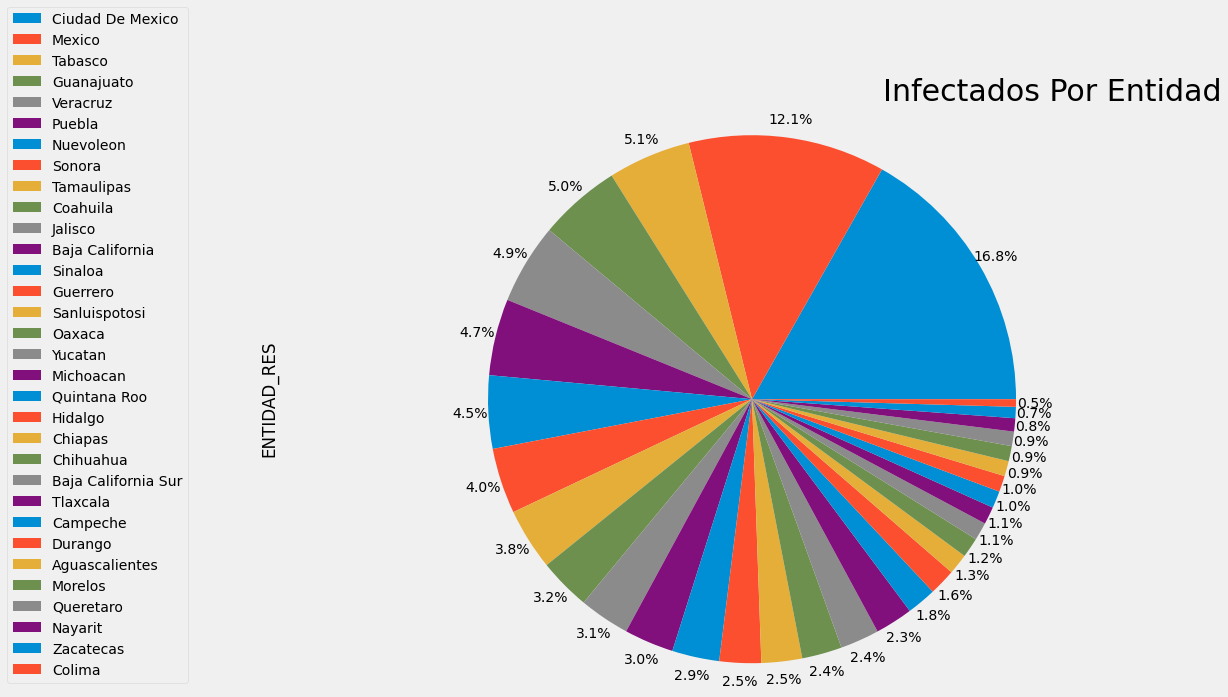

In [13]:
ENTIDAD_INFECTADOS.plot(kind='pie',shadow=None,autopct='%1.1f%%',figsize=(15,10),labels=None,pctdistance=1.07)
plt.title('Infectados Por Entidad',loc="right",fontsize='30')
plt.legend(labels=ENTIDAD_INFECTADOS.index,loc='lower left',bbox_to_anchor=(-0.3, 0., 0.5, 0.5))
plt.axis('equal')

In [14]:
ENTIDAD_DEFUNCIONES=df_virus.loc[(df_virus['RESULTADO'] == 1) & (df_virus['FECHA_DEF'] != '9999-99-99') & (df_virus.FECHA_DEF.notnull())]
ENTIDAD_DEFUNCIONES=ENTIDAD_DEFUNCIONES['ENTIDAD_RES'].value_counts()

(-1.1009182532450204,
 1.1000437266587821,
 -1.10058806932925,
 1.1068423076966156)

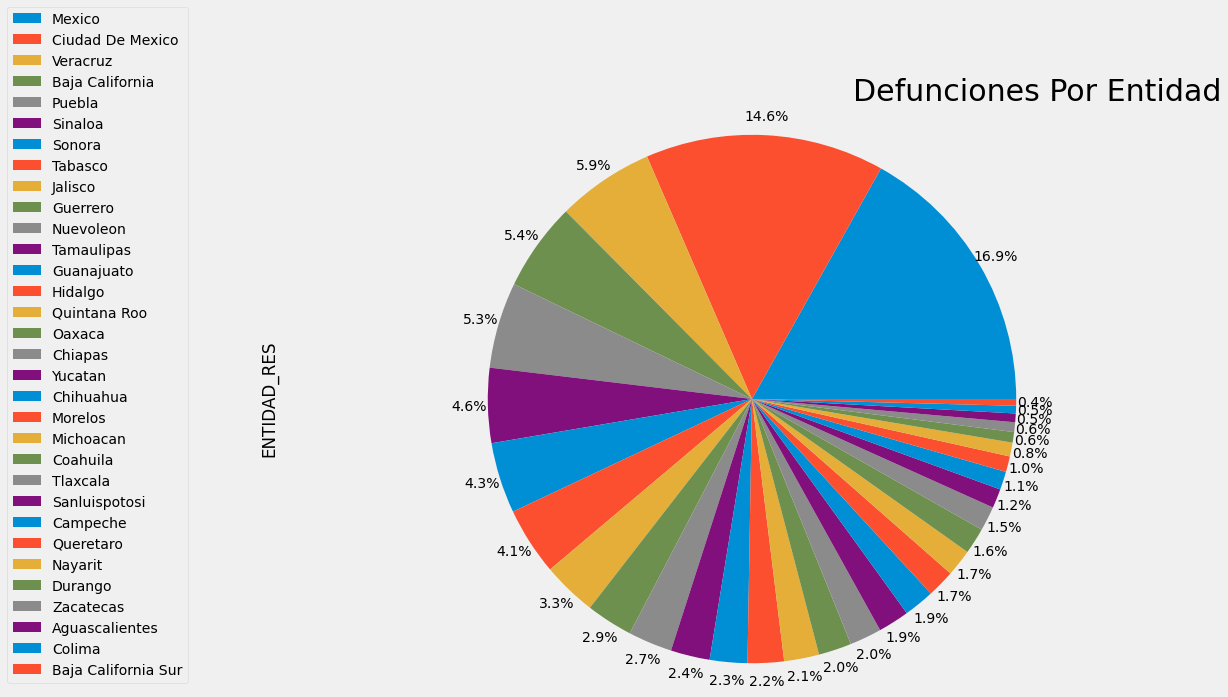

In [15]:
ENTIDAD_DEFUNCIONES.plot(kind='pie',shadow=None,autopct='%1.1f%%',figsize=(15,10),labels=None,pctdistance=1.07)
plt.title('Defunciones Por Entidad',loc="right",fontsize='30')
plt.legend(labels=ENTIDAD_DEFUNCIONES.index,loc='lower left',bbox_to_anchor=(-0.3, 0., 0.5, 0.5))
plt.axis('equal')

In [16]:
positivos = df_virus.loc[df_virus['RESULTADO'] == 1]
muertes = df_virus.loc[(df_virus['RESULTADO'] == 1) & (df_virus['FECHA_DEF'] != '9999-99-99') & (df_virus.FECHA_DEF.notnull())]
estados=df_virus.groupby(['ENTIDAD_RES'])
estados=estados['ENTIDAD_RES']
estados.head()
positivos.head()

,ORIGEN,SECTOR,SEXO,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,NEUMONIA,...,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,RESULTADO
0,2,3,1,Sinaloa,6,2,09/06/2020,06/06/2020,16/06/2020,1,...,2,2,2,2,2,2,2,2,2,1
1,2,4,1,Aguascalientes,1,1,23/04/2020,13/04/2020,9999-99-99,2,...,2,2,2,2,2,2,2,2,2,1
2,2,4,2,Ciudad De Mexico,2,2,29/04/2020,22/04/2020,03/05/2020,1,...,2,2,2,1,2,2,2,2,2,1
3,2,3,1,Tabasco,4,1,25/06/2020,20/06/2020,9999-99-99,1,...,2,2,2,1,2,2,2,2,2,1
4,2,4,1,Sonora,55,2,30/03/2020,27/03/2020,9999-99-99,1,...,2,2,2,1,2,2,2,2,2,1


In [17]:
sectores={
1:'CRUZ ROJA',
2:'DIF',
3:'ESTATAL',
4:'IMSS',
5:'IMSS-BIENESTAR',
6:'ISSSTE',
7:'MUNICIPAL',
8:'PEMEX',
9:'PRIVADA',
10:'SEDENA',
11:'SEMAR',
12:'SSA',
13:'UNIVERSITARIO',
99:'NO ESPECIFICADO'}
sectores

{1: 'CRUZ ROJA',
 2: 'DIF',
 3: 'ESTATAL',
 4: 'IMSS',
 5: 'IMSS-BIENESTAR',
 6: 'ISSSTE',
 7: 'MUNICIPAL',
 8: 'PEMEX',
 9: 'PRIVADA',
 10: 'SEDENA',
 11: 'SEMAR',
 12: 'SSA',
 13: 'UNIVERSITARIO',
 99: 'NO ESPECIFICADO'}

In [18]:
df_virus['SECTOR'] =df_virus['SECTOR'].map(sectores)

In [19]:
SECTOR_INFECTADOS=df_virus.loc[(df_virus['RESULTADO'] == 1)]
SECTOR_INFECTADOS=SECTOR_INFECTADOS['SECTOR'].value_counts()
SECTOR_INFECTADOS.head()

SSA        257392
IMSS       150156
ISSSTE      20503
PRIVADA     14214
ESTATAL     10384
Name: SECTOR, dtype: int64

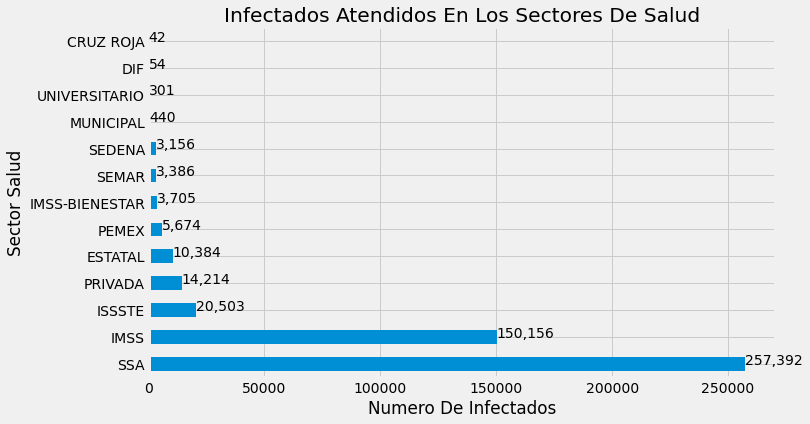

In [20]:
SECTOR_INFECTADOS.plot(kind='barh',figsize=(10,6))
plt.ylabel('Sector Salud')
plt.xlabel('Numero De Infectados')
plt.title('Infectados Atendidos En Los Sectores De Salud')
for index,value in enumerate(SECTOR_INFECTADOS):
    label=format(int(value),',')
    plt.annotate(label,xy=(value,index),color='black')
plt.show()

In [21]:
SECTOR_DEFUNCIONES=df_virus.loc[(df_virus['RESULTADO'] == 1) & (df_virus['FECHA_DEF'] != '9999-99-99') & (df_virus.FECHA_DEF.notnull())]
SECTOR_DEFUNCIONES=SECTOR_DEFUNCIONES['SECTOR'].value_counts()
SECTOR_DEFUNCIONES.head()

IMSS       28489
SSA        15520
ISSSTE      3557
ESTATAL     1225
PEMEX        842
Name: SECTOR, dtype: int64

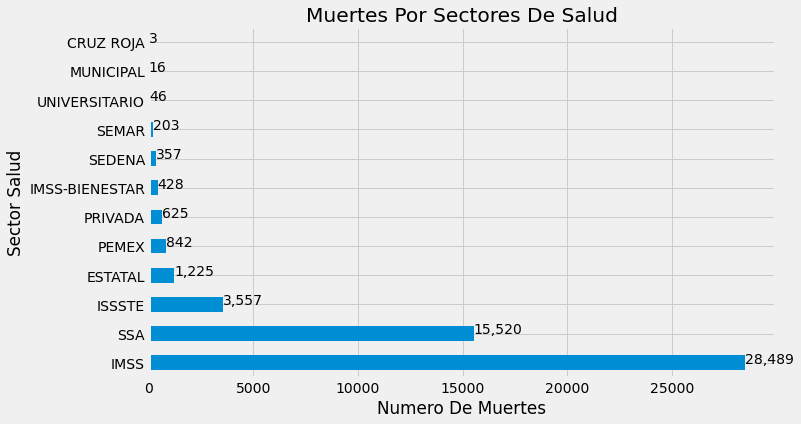

In [22]:
SECTOR_DEFUNCIONES.plot(kind='barh',figsize=(10,6))
plt.ylabel('Sector Salud')
plt.xlabel('Numero De Muertes')
plt.title('Muertes Por Sectores De Salud')
for index,value in enumerate(SECTOR_DEFUNCIONES):
    label=format(int(value),',')
    plt.annotate(label,xy=(value,index),color='black')
plt.show()

In [23]:
df_virus.head()

,ORIGEN,SECTOR,SEXO,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,NEUMONIA,...,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,RESULTADO
0,2,ESTATAL,1,Sinaloa,6,2,09/06/2020,06/06/2020,16/06/2020,1,...,2,2,2,2,2,2,2,2,2,1
1,2,IMSS,1,Aguascalientes,1,1,23/04/2020,13/04/2020,9999-99-99,2,...,2,2,2,2,2,2,2,2,2,1
2,2,IMSS,2,Ciudad De Mexico,2,2,29/04/2020,22/04/2020,03/05/2020,1,...,2,2,2,1,2,2,2,2,2,1
3,2,ESTATAL,1,Tabasco,4,1,25/06/2020,20/06/2020,9999-99-99,1,...,2,2,2,1,2,2,2,2,2,1
4,2,IMSS,1,Sonora,55,2,30/03/2020,27/03/2020,9999-99-99,1,...,2,2,2,1,2,2,2,2,2,1


In [24]:
mexico_geo=r'estados.json'

In [25]:
df_virus.head()


,ORIGEN,SECTOR,SEXO,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,NEUMONIA,...,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,RESULTADO
0,2,ESTATAL,1,Sinaloa,6,2,09/06/2020,06/06/2020,16/06/2020,1,...,2,2,2,2,2,2,2,2,2,1
1,2,IMSS,1,Aguascalientes,1,1,23/04/2020,13/04/2020,9999-99-99,2,...,2,2,2,2,2,2,2,2,2,1
2,2,IMSS,2,Ciudad De Mexico,2,2,29/04/2020,22/04/2020,03/05/2020,1,...,2,2,2,1,2,2,2,2,2,1
3,2,ESTATAL,1,Tabasco,4,1,25/06/2020,20/06/2020,9999-99-99,1,...,2,2,2,1,2,2,2,2,2,1
4,2,IMSS,1,Sonora,55,2,30/03/2020,27/03/2020,9999-99-99,1,...,2,2,2,1,2,2,2,2,2,1


In [ ]:
m = folium.Map(
    location=[24.5627966,-106.5617301],
    tiles='Mapbox Bright',
    zoom_start=5  # Limited levels of zoom for free Mapbox tiles.
)

folium.GeoJson(
    mexico_geo,
    name='geojson'
).add_to(m)
folium.LayerControl().add_to(m)
m

In [35]:
df_ENTIDAD_DEFUNCIONES = ENTIDAD_DEFUNCIONES.to_frame().reset_index()
df_ENTIDAD_DEFUNCIONES

,index,ENTIDAD_RES
0,Mexico,8663
1,Ciudad De Mexico,7502
2,Veracruz,3045
3,Baja California,2774
4,Puebla,2699
5,Sinaloa,2346
6,Sonora,2222
7,Tabasco,2129
8,Jalisco,1712
9,Guerrero,1464


In [36]:
df_ENTIDAD_INFECTADOS = ENTIDAD_INFECTADOS.to_frame().reset_index()
df_ENTIDAD_INFECTADOS

,index,ENTIDAD_RES
0,Ciudad De Mexico,78898
1,Mexico,56564
2,Tabasco,23783
3,Guanajuato,23527
4,Veracruz,23131
5,Puebla,21987
6,Nuevoleon,20984
7,Sonora,18835
8,Tamaulipas,17759
9,Coahuila,14913


In [37]:
world_map=folium.Map(location=[24.5627966,-106.5617301],zoom_start=5,tiles='Mapbox Bright')
world_map.choropleth(
geo_data=mexico_geo,
data=df_ENTIDAD_INFECTADOS,
columns=['index','ENTIDAD_RES'],
key_on='properties.state_name',
fill_color='RdPu',
fill_opacity=0.8,
line_opacity=0.2,
legend_name='Infectados Por Estado')
world_map

C:\Users\Francisco Favela\Anaconda3\lib\site-packages\folium\folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [45]:
world_map=folium.Map(location=[24.5627966,-106.5617301],zoom_start=5,tiles='Mapbox Bright')
world_map.choropleth(
geo_data=mexico_geo,
data=df_ENTIDAD_DEFUNCIONES,
columns=['index','ENTIDAD_RES'],
key_on='properties.state_name',
fill_color='RdPu',
fill_opacity=0.8,
line_opacity=0.2,
legend_name='Defunciones Por Estado')
world_map

C:\Users\Francisco Favela\Anaconda3\lib\site-packages\folium\folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning
